### Stock Market Prediction And Forecasting Using Stacked LSTM

In [6]:
### Keras and Tensorflow >2.0

In [5]:
### Data Collection
import yfinance as yf

df = yf.download('AAPL')


[*********************100%%**********************]  1 of 1 completed


In [7]:
df.to_csv('AAPL.csv')

In [8]:
import pandas as pd

In [9]:
df=pd.read_csv('AAPL.csv')

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


In [11]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10990,2024-07-19,224.820007,226.800003,223.279999,224.309998,224.309998,49151500
10991,2024-07-22,227.009995,227.779999,223.089996,223.960007,223.960007,48201800
10992,2024-07-23,224.369995,226.940002,222.679993,225.009995,225.009995,39960300
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.539993,61630300
10994,2024-07-25,218.869995,220.850006,214.619995,219.850006,219.850006,31773801


In [13]:
df1=df.reset_index()['Close']

In [14]:
df1

0          0.128348
1          0.121652
2          0.112723
3          0.115513
4          0.118862
            ...    
10990    224.309998
10991    223.960007
10992    225.009995
10993    218.539993
10994    219.850006
Name: Close, Length: 10995, dtype: float64

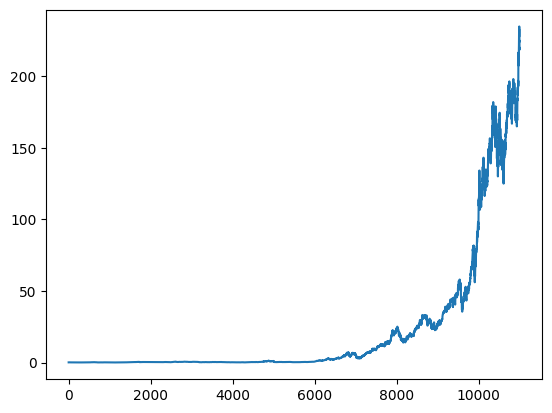

In [15]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [16]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [17]:
import numpy as np

In [18]:
df1

0          0.128348
1          0.121652
2          0.112723
3          0.115513
4          0.118862
            ...    
10990    224.309998
10991    223.960007
10992    225.009995
10993    218.539993
10994    219.850006
Name: Close, Length: 10995, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
print(df1)

[[3.37524764e-04]
 [3.09003370e-04]
 [2.70970551e-04]
 ...
 [9.58214528e-01]
 [9.30655741e-01]
 [9.36235704e-01]]


In [21]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [22]:
training_size,test_size

(7146, 3849)

In [23]:
train_data

array([[0.00033752],
       [0.000309  ],
       [0.00027097],
       ...,
       [0.01780992],
       [0.01728509],
       [0.01748589]])

In [24]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [25]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
print(X_train.shape), print(y_train.shape)

(7045, 100)
(7045,)


(None, None)

In [27]:
print(X_test.shape), print(ytest.shape)

(3748, 100)
(3748,)


(None, None)

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=25,batch_size=64,verbose=1)

Epoch 1/25
111/111 [==============================] - 21s 191ms/step - loss: 4.5037e-07 - val_loss: 0.0057
Epoch 2/25
111/111 [==============================] - 25s 223ms/step - loss: 4.2503e-07 - val_loss: 0.0042
Epoch 3/25
111/111 [==============================] - 21s 191ms/step - loss: 5.2696e-07 - val_loss: 0.0031
Epoch 4/25
111/111 [==============================] - 22s 195ms/step - loss: 3.9512e-07 - val_loss: 0.0065
Epoch 5/25
111/111 [==============================] - 22s 198ms/step - loss: 3.9784e-07 - val_loss: 0.0030
Epoch 6/25
111/111 [==============================] - 21s 186ms/step - loss: 3.8075e-07 - val_loss: 0.0047
Epoch 7/25
111/111 [==============================] - 22s 203ms/step - loss: 4.7307e-07 - val_loss: 0.0033
Epoch 8/25
111/111 [==============================] - 23s 209ms/step - loss: 3.2974e-07 - val_loss: 0.0035
Epoch 9/25
111/111 [==============================] - 21s 189ms/step - loss: 3.4870e-07 - val_loss: 0.0034
Epoch 10/25
111/111 [================

In [35]:
import tensorflow as tf

In [36]:
tf.__version__

'2.15.0'

In [37]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

118/118 [==============================] - 5s 44ms/step


In [38]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [39]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1.613273008440607

In [40]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

76.05929213265382

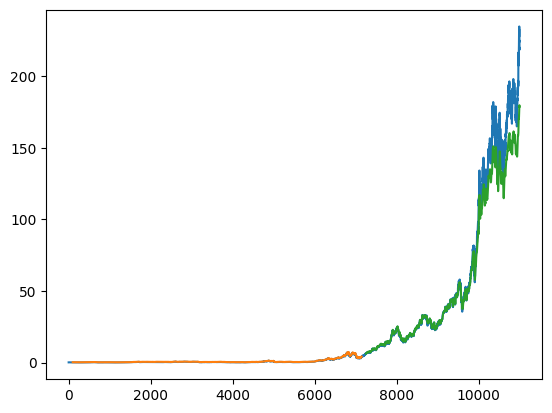

In [41]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [42]:
len(test_data)

3849

In [43]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 3508)

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:
temp_input

[0.03812151340374833,
 0.038288845496701536,
 0.03780357308419513,
 0.03776706249134043,
 0.037182905192111516,
 0.03628993928369181,
 0.03674022440912018,
 0.03634318186719721,
 0.036547028615153854,
 0.03668089672680567,
 0.03677217320894241,
 0.03787202841472331,
 0.03815193483564517,
 0.03915595582840559,
 0.03900991751913556,
 0.0397872706123308,
 0.03981008770179061,
 0.039861811041668097,
 0.040414019541074785,
 0.0405691854985585,
 0.04089777270995329,
 0.04186375980408238,
 0.04168121496410638,
 0.04287690844505649,
 0.042959053216830814,
 0.043564508361891637,
 0.04374249140883517,
 0.04425971262116381,
 0.044083248817848183,
 0.04342911694446318,
 0.04350669992320503,
 0.042956014729575,
 0.04276889997226905,
 0.04217866163637976,
 0.04374553802038847,
 0.043783563794722334,
 0.043788129649903536,
 0.04452592960083952,
 0.044722167944210404,
 0.045205925175237645,
 0.045449325065453544,
 0.04577943558262497,
 0.04767033332284726,
 0.048166260751492725,
 0.04687168238382011,


In [47]:
from numpy import array
import numpy as np

lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[-n_steps:])
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[-n_steps:]  # Keep only the last n_steps values
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        # Handle case when temp_input is less than n_steps
        # For simplicity, you might just want to wait until enough data is available
        print("Not enough data to make a prediction.")
        break

print(lst_output)


[[0.7548702359199524], [0.7468832731246948], [0.7337118983268738], [0.7164052128791809], [0.6964133381843567], [0.6750410795211792], [0.653270959854126], [0.6317611932754517], [0.610910177230835], [0.590932309627533], [0.5719245076179504], [0.5539143085479736], [0.5368919372558594], [0.5208296775817871], [0.505691409111023], [0.4914381802082062], [0.47802963852882385], [0.46542587876319885], [0.453586220741272], [0.4424704313278198], [0.43203797936439514], [0.42224884033203125], [0.4130634367465973], [0.40444302558898926], [0.39635008573532104], [0.38874807953834534], [0.3816021978855133], [0.37487950921058655], [0.3685484528541565], [0.3625795245170593]]


In [48]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [49]:
import matplotlib.pyplot as plt

In [50]:
len(df1)

10995

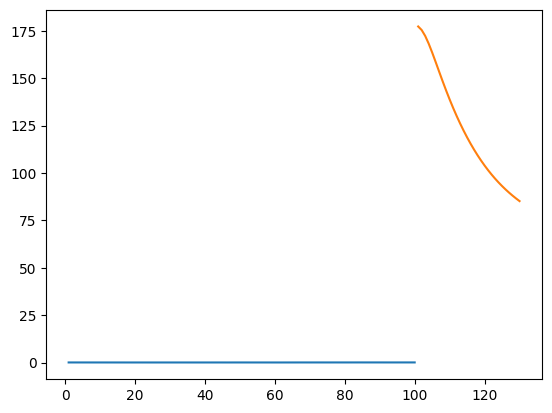

In [54]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:1158+len(day_new)]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

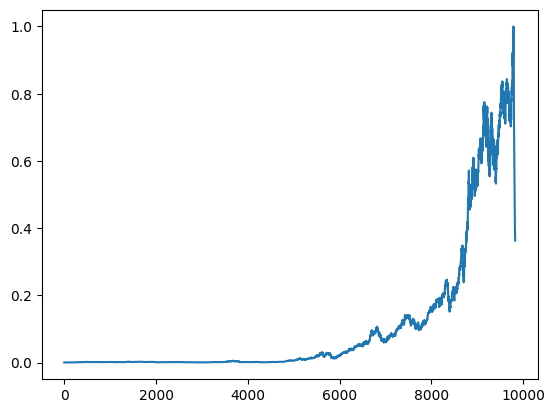

In [55]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [56]:
df3=scaler.inverse_transform(df3).tolist()

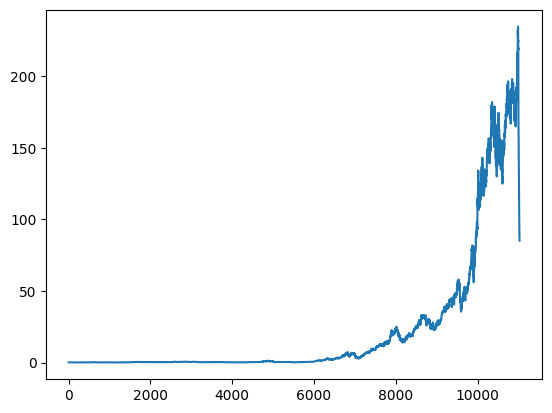

In [57]:
plt.plot(df3)